# 数据操作

In [1]:
import torch

In [2]:
# 注释后边是tensorflow相同形式的代码
x = torch.arange(12)  #创建张量tf.range(12)
print(x)
print(x.shape)  #形状x.shape
print(x.numel())  #元素总数x.size
x = x.reshape(3, 4)  # x转换为3行4列的形状x=tf.reshape(x,(3,4))
print(x)
print(x.numel())  #转换后的元素总数（不变）

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
12


In [3]:
print(torch.zeros(3, 4, 5))  #全零张量tf.zeros(3,4,5)
print(torch.ones(3, 4, 5))  #全1张量tf.ones(3,4,5)

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [4]:
torch.randn(2, 3)  #正太分布tf.random.normal(shape=[2,3])

tensor([[ 1.3241, -0.0426, -0.0885],
        [-1.0526, -1.0706,  2.1644]])

In [5]:
torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  #创建张量tf.constant()

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [6]:
# 运算符
# 元素级别的加减乘除乘方跟python运算符的语法一样
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
# x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

print(torch.exp(x))  #tf.exp(x)

# 按某个轴进行张量拼接
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1))  #tf.concat()

print(X == Y)  #判断对应位置的元素是否相等，返回一个boolean类型的矩阵
# 上面这个式子改成>、<也是一样的逻辑
print(X.sum())  #对所有元素求和tf.reduce_sum(X)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]) tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])
tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])
tensor(66.)


In [7]:
# 广播
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
print(a)
print(b)
print(a + b)

tensor([[0],
        [1],
        [2]])
tensor([[0, 1]])
tensor([[0, 1],
        [1, 2],
        [2, 3]])


In [8]:
# 索引和切片：都是左闭右开区间
X[1:3]  #取到的是第1、2个元素

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [9]:
# 节省内存
# 使用切片来减少内存
X[:] = X + Y

In [10]:
# 转为其他python对象
A = X.numpy()
B = torch.tensor(A)
print(type(A), type(B))
# 将大小为1的张量转为标量
a = torch.tensor([3.5])
print(a, a.item(), float(a), int(a))

<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([3.5000]) 3.5 3.5 3


# 数据预处理

## os.makedirs()
exist_ok=True是os.makedirs()方法的一个参数，它的作用是当目录已经存在时不会抛出异常，即不会报错。如果没有设置该参数，默认为False，则当路径已经存在时会抛出FileExistsError异常。

除此之外，os.makedirs()方法还有一些其他的常用参数：

- mode：指定创建目录的权限，默认是0o777（即rwxrwxrwx），可以使用八进制表示。
- exist_ok：如上所述，指定当目录已存在时是否抛出异常。
- parents：指定是否同时创建中间目录。如果该参数为True，则在父目录不存在时也会自动创建。
- dir_fd：指定要在哪个文件描述符下创建目录。默认为None，即在当前工作目录下创建。
- onerror：指定在创建目录时遇到错误时的处理方式。默认为raise，即抛出异常。可以将其设置为一个回调函数来自定义处理方式。

需要注意的是，在使用os.makedirs()方法时，应该确保目标路径合法且安全，以避免意外覆盖或删除现有文件。建议使用绝对路径或可靠的相对路径，并仔细检查参数设置、路径拼接等操作。

In [11]:
import os

os.makedirs(os.path.join('.', 'datasets'), exist_ok=True)
data_file = os.path.join('.', 'datasets', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  #表头，分别表示房间数量（“NumRooms”）、巷子类型（“Alley”）和房屋价格（“Price”）
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [12]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [13]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


## pd.get_dummies()
dummy_na=True是将输入变量中的缺失值也视为一种类别进行编码，即将缺失值也转化为哑变量(dummy variable)。

pd.get_dummies()函数的作用是将分类变量转换为哑变量（0或1）。在该函数中，参数dummy_na是一个可选参数，如果设置为True，则会自动为缺失值创建额外的列，并将其编码为1或0，以表示每行数据是否缺失。

还有另外两个需要注意的参数：

- columns：指定要进行哑变量转换的列名，如果不指定则会对所有分类变量进行转换。
- prefix：指定哑变量的前缀，默认为原始的列名。

例如，如果我们有一个“Gender”列，其中包含“Male”、“Female”和缺失值，那么使用pd.get_dummies(inputs, dummy_na=True)将生成三列：“Gender_Female”、“Gender_Male”和“Gender_nan”，其中“Gender_nan”代表缺失值。

In [14]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [15]:
print(type(inputs))
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

<class 'pandas.core.frame.DataFrame'>


(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 线性代数

In [16]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [17]:
# 降维求和
print(A)
print(A.sum())
print(A.sum(axis=0))
print(A.sum(axis=1))
print(A.sum(axis=[0, 1]))  #沿着0轴和1轴对张量求和
# A.mean()均值函数同理

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor(190.)
tensor([40., 45., 50., 55.])
tensor([ 6., 22., 38., 54., 70.])
tensor(190.)


In [20]:
# 非降维求和
print(A.sum(axis=0, keepdims=True))
print(A.sum(axis=1, keepdims=True))

sum_A = A.sum(axis=0, keepdims=True)
print(A / sum_A)

print(A.cumsum(axis=0))  #累加和
print(A.cumsum(axis=1))

tensor([[40., 45., 50., 55.]])
tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])
tensor([[0.0000, 0.0222, 0.0400, 0.0545],
        [0.1000, 0.1111, 0.1200, 0.1273],
        [0.2000, 0.2000, 0.2000, 0.2000],
        [0.3000, 0.2889, 0.2800, 0.2727],
        [0.4000, 0.3778, 0.3600, 0.3455]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])
tensor([[ 0.,  1.,  3.,  6.],
        [ 4.,  9., 15., 22.],
        [ 8., 17., 27., 38.],
        [12., 25., 39., 54.],
        [16., 33., 51., 70.]])


In [21]:
y = torch.ones(4, dtype=torch.float32)
print(x, y, torch.dot(x, y))  #点积
print(A.shape, x.shape, torch.mv(A, x))  #向量积
B = torch.ones(4, 3)
torch.mm(A, B)  #矩阵乘法

tensor([1., 2., 4., 8.]) tensor([1., 1., 1., 1.]) tensor(15.)
torch.Size([5, 4]) torch.Size([4]) tensor([ 34.,  94., 154., 214., 274.])


tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)  #范数，向量的范数是表示一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小
# torch.norm()计算矩阵的Frobenius范数

# 自动微分

In [2]:
import torch

x = torch.arange(4.0)
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)，同tf.Variable(x)
print(x.grad)  # 默认值是None

None


In [3]:
y = 2 * torch.dot(x, x)
# tf需要把所有计算记录在磁带上
# with tf.GradientTape() as t:
#     y = 2 * tf.tensordot(x, x, axes=1)
print(y)
y.backward()  #x_grad=t.gradient(y,x)
print(x.grad)

tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])


In [4]:
# 函数y=2x.T*x关于x的梯度应为4x，验证这个梯度是否计算正确
x.grad == 4 * x

tensor([True, True, True, True])

In [5]:
# 计算x的另一个函数
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值（tf默认直接覆盖）
# with tf.GradientTape() as t:
#     y = tf.reduce_sum(x)
# t.gradient(y, x)  # 被新计算的梯度覆盖

x.grad.zero_()
y = x.sum()
print(y)
y.backward()
print(x.grad)

tensor(6., grad_fn=<SumBackward0>)
tensor([1., 1., 1., 1.])


当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

In [7]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度
# 本例只想求偏导数的和，所以传入一个1的梯度是合适的
x.grad.zero_()
y = x * x  #对应元素相乘
print(y)
y.sum().backward()  #等价于y.backward(torch.ones(len(x)))
print(x.grad)

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 2., 4., 6.])


对上面这段代码的解释：

这段代码使用了PyTorch库进行数值计算和自动求导。

首先，`x.grad.zero_()`是将`x`的梯度初始化为零。这是为了确保每次计算梯度之前，都将梯度清零，以避免之前的梯度对当前计算的影响。

接下来，`y = x * x`表示将`x`的每个元素与自身相乘，即逐元素平方。

然后，`y.sum().backward()`是对`y`进行求和并进行反向传播。`sum()`将`y`中的所有元素相加得到一个标量值，然后使用自动求导函数`backward()`计算关于`x`的梯度。这里不需要传入参数，因为默认情况下，`backward()`函数会将梯度传播为1。

`y.backward(torch.ones(len(x)))`是等价的写法，其中`torch.ones(len(x))`创建了一个与`x`具有相同长度的张量，并且每个元素的值都为1。在这种情况下，我们将该张量作为参数传递给`backward()`函数，它会将这个张量的值作为梯度的缩放因子。因为所有元素的值都是1，所以实际上等价于不传递参数，默认缩放因子为1。

这个参数的作用是用于梯度的缩放。在某些情况下，我们可能希望对梯度进行缩放或加权。通过传递一个张量作为参数，我们可以对梯度进行按元素缩放，以实现自定义的加权求和操作。在大多数情况下，不传递参数即可，使用默认的缩放因子1即可满足需求。

**分离计算**

有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u\*x关于x的偏导数，同时将u作为常数处理， 而不是z=x\*x\*x关于x的偏导数。

In [9]:
x.grad.zero_()
y = x * x
u = y.detach()  # 分离y并将其赋值给u，将u作为一个常数
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x\*x关于的x的导数，即2\*x。

In [10]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [11]:
def f(a):
    b=a*2
    while b.norm()<1000:    # 计算b的范数
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

In [14]:
a=torch.randn(size=(),requires_grad=True)
print(a)
d=f(a)
print(d)
d.backward()
print(a.grad)
print(a.grad==d/a)

tensor(0.6090, requires_grad=True)
tensor(1247.1744, grad_fn=<MulBackward0>)
tensor(2048.)
tensor(True)


# 概率

In [24]:
%matplotlib inline
from torch.distributions import multinomial #多项式分布
from d2l import torch as d2l

fair_probs=torch.ones([6])/6    #设置每个样本抽到的概率
multinomial.Multinomial(2,fair_probs).sample()  #按fair_probs概率抽样

tensor([1., 0., 0., 0., 1., 0.])

这段代码使用了Python中的numpy库中的multinomial函数，用于从多项分布中抽取样本。

具体来说，该函数接受两个参数：n和p。其中，n表示抽取的次数，p是一个k维向量，表示每个离散事件发生的概率（k为离散事件的种类数）。

在这里，由于第一个参数是1，所以只抽取了一次样本。而fair_probs是一个包含k个元素的列表，表示每个离散事件发生的概率相等，即是一个公平的概率分布。

因此，这行代码实际上是在从一个公平的多项分布中随机抽取了一个样本，返回的结果是一个包含k个元素的列表，其中仅有一个元素为1，其他元素均为0，表示哪个离散事件被抽中了。

In [26]:
# 抽取1000次
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1840, 0.1620, 0.1590, 0.1750, 0.1670, 0.1530])

tensor([[2., 0., 2., 4., 2., 0.],
        [0., 1., 3., 3., 1., 2.],
        [1., 0., 4., 1., 0., 4.],
        ...,
        [3., 0., 2., 3., 2., 0.],
        [3., 3., 2., 1., 1., 0.],
        [3., 1., 0., 2., 2., 2.]])
tensor([[  2.,   0.,   2.,   4.,   2.,   0.],
        [  2.,   1.,   5.,   7.,   3.,   2.],
        [  3.,   1.,   9.,   8.,   3.,   6.],
        ...,
        [820., 770., 875., 786., 862., 867.],
        [823., 773., 877., 787., 863., 867.],
        [826., 774., 877., 789., 865., 869.]])
tensor([[0.2000, 0.0000, 0.2000, 0.4000, 0.2000, 0.0000],
        [0.1000, 0.0500, 0.2500, 0.3500, 0.1500, 0.1000],
        [0.1000, 0.0333, 0.3000, 0.2667, 0.1000, 0.2000],
        ...,
        [0.1647, 0.1546, 0.1757, 0.1578, 0.1731, 0.1741],
        [0.1649, 0.1549, 0.1758, 0.1577, 0.1729, 0.1737],
        [0.1652, 0.1548, 0.1754, 0.1578, 0.1730, 0.1738]])


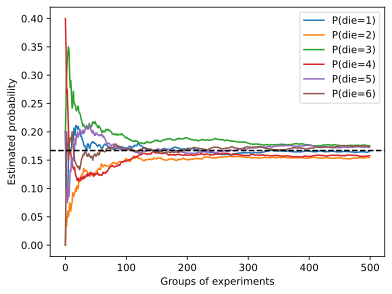

In [33]:
# 进行500组实验，每组抽取10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts)
cum_counts=counts.cumsum(dim=0)
print(cum_counts)
estimates=cum_counts/cum_counts.sum(dim=1,keepdims=True)
print(estimates)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

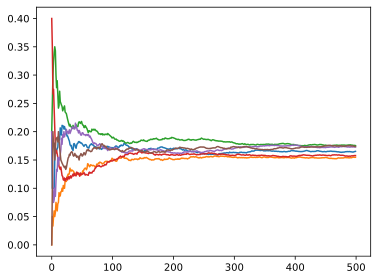

In [36]:
import matplotlib.pyplot as plt
plt.plot(torch.arange(500),estimates)
plt.show()

# 查阅文档

为了知道模块中可以调用哪些函数和类，可以调用dir函数。 例如，我们可以查询随机数生成模块中的所有属性：

In [37]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

通常可以忽略以“__”（双下划线）开始和结束的函数，它们是Python中的特殊对象， 或以单个“_”（单下划线）开始的函数，它们通常是内部函数。 根据剩余的函数名或属性名，我们可能会猜测这个模块提供了各种生成随机数的方法， 包括从均匀分布（uniform）、正态分布（normal）和多项分布（multinomial）中采样。

有关如何使用给定函数或类的更具体说明，可以调用help函数。 例如，我们来查看张量ones函数的用法。

In [38]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

在Jupyter记事本中，我们可以使用?指令在另一个浏览器窗口中显示文档。 例如，list?指令将创建与help(list)指令几乎相同的内容，并在新的浏览器窗口中显示它。 此外，如果我们使用两个问号，如list??，将显示实现该函数的Python代码。